<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2
## Easy
### 2E1
#### Question
Which of the expressions below correspond to the statement: *the probability of rain on Monday*?
1.   Pr(rain)
2.   Pr(rain|Monday)
3.   Pr(Monday|rain)
4.   Pr(rain, Monday)/Pr(Monday)

#### Answer
1.   WRONG.  Only specifies the probability of rain without conditioning on Monday
2.   CORRECT.
3.   WRONG.  Gives the probability that it is Monday giving that observation that is raining.
4.   CORRECT.

Notice that Pr(rain|Monday) = Pr(rain, Monday)/Pr(Monday)

### 2E2
#### Question
Which of the following statements corresponds to the expression: Pr(Monday|rain)?
1.   The probability of rain on Monday.
2.   The probability of rain, given that it is Monday.
3.   The probability that it is Monday, given that it is raining.
4.   The probability that it is Monday and that it is raining?

#### Answer
1.   WRONG.  Describes Pr(rain|Monday), which the reverse of what we want.
2.   WRONG.  Describes Pr(rain|Monday), which is the reverse of what we want.
3.   CORRECT.
4.   WRONG.  This gives the joint probability Pr(Monday, rain); not the conditional probability Pr(Monday|rain).

### 2E3
#### Question
Which of the expressions below correspond to the statement: *the probability that is Monday, given that it is raining*?
1.   Pr(Monday|rain)
2.   Pr(rain|Monday)
3.   Pr(rain|Monday)*Pr(Monday)
4.   (Pr(rain|Monday)*Pr(Monday))/Pr(rain)
5.   (Pr(Monday|rain)*Pr(rain))/Pr(Monday)

#### Answer
1.   CORRECT.
2.   WRONG.  This is the reverse of what we want.
3.   WRONG.  It may not be obvious, but this is the joint probability Pr(rain, Monday).
4.   CORRECT.  By Bayes' Rule.
5.   WRONG.  This is, by Bayes' Rule, Pr(rain|Monday), which is the reverse of what we want.

Notice that p(Monday|rain) = (Pr(rain|Monday)*Pr(Monday))/Pr(rain)

### 2E4
#### Question
The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original,  so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no  objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What  does it mean to say “the probability of water is 0.7”?
#### Answer
Although we conceptualize many events as "random", these events are often the result of a (non-random) deterministic process whereby.  The uncertainty of the event, then, is not (except maybe for quantum mechanics) due to true randomness; rather, it is due to our own ignorance about the deterministic process.
In reference to the globe-tossing example, the ratio of land:water is not random, it is fixed.  Nor is the flight of the globe or our hand placement upon catching the globe.  However, we do not know the details of these deterministic processes and so we treat the outcome as random.

## Medium
### 2M1
#### Question
Recall the globe tossing model from the chapter.  Compute and plot the grid-approximate posterior distribution for each of the following sets of observations.  In each case, assume a uniform prior for *p*.
1.   W, W, W
2.   W, W, W, L
3.   L, W, W, L, W, W, W


#### Answer
Start by creating "grid" of water-proportion values:

In [ ]:
w_grid <- seq(from=0, to=1, by=0.01)
w_grid

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

So we've created a vector ("w_grid") that contains 101 values.  The value "0.5" represents the possibility that 1/2 of the globe is covered in water, the value "0.75" represents 3/4 of the globe is covered in water, and so on.  When we get to plotting our probabilities, these values will make up the x-axis like so:

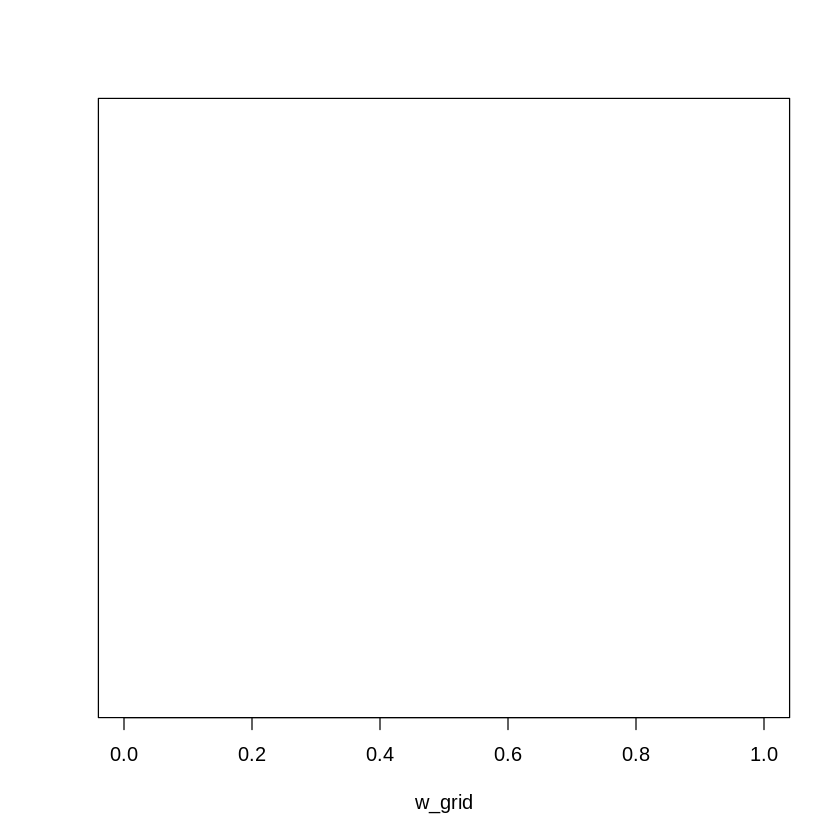

In [ ]:
plot(NULL,
     xlim=c(0,1), xlab="w_grid",
     ylim=c(0,1), ylab=NA, yaxt="n")

Next, let's create our uniform prior.  To do this, we need to assign a (prior) probability to each value in w_grid.

(NOTE: If we wanted to, since a uniform prior will not alter the likelihood, we could ignore this step).

In [ ]:
prior <- rep(1/length(w_grid), length(w_grid))
prior

[1] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
  [7] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [13] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [19] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [25] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [31] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [37] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [43] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [49] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [55] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [61] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [67] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [73] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [79] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [85] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [91] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 [97] 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099

Now we've created another vector ("prior") that has the same number of elements as w_grid.  Each value in prior is the same, implying that we believe that any proportion of water on the globe is equally plausible.  This is, of course, absurd; but we'll role with it for this problem.  Let's visualize the prior.

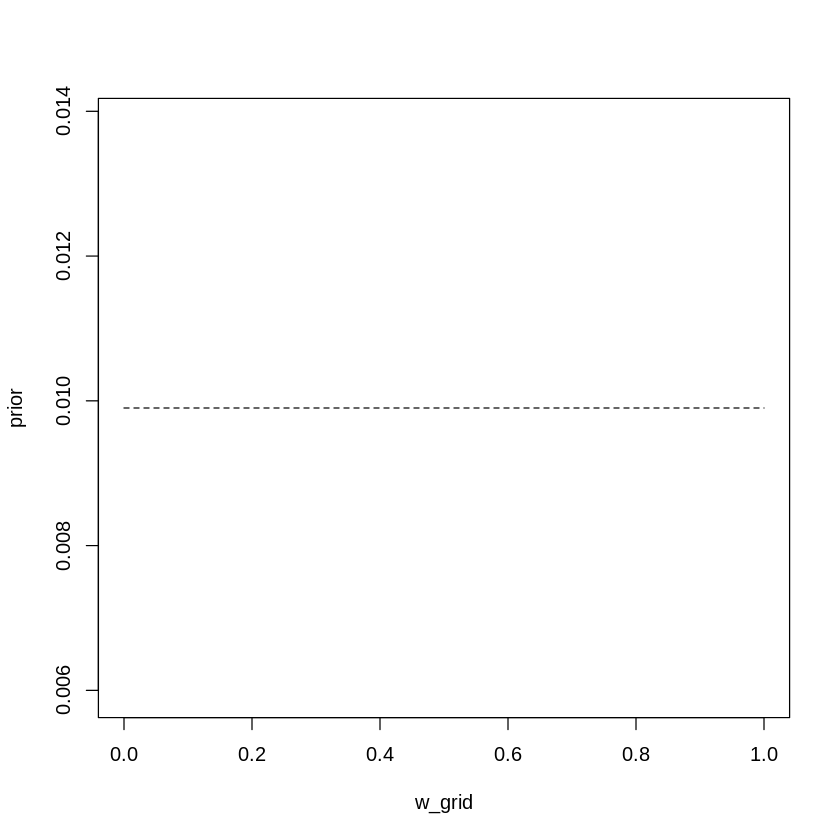

In [ ]:
plot(prior ~ w_grid, type="l", lty=2)

Of course, it is a straight horizontal line across all values of w_grid.

Now let's create our likelihoods.  In each case, since an area of the globe can only be either water or land, we'll model the proportion of water with a binomial distribution.

In [ ]:
likelihood1 <- dbinom(3, size=3, prob=w_grid) # W, W, W
likelihood2 <- dbinom(3, size=4, prob=w_grid) # W, W, W, L
likelihood3 <- dbinom(5, size=7, prob=w_grid) # L, W, W, L, W, W, W

Importantly, although the sequences of globe tosses are presented in a certain order (e.g., W, W, W, L), we are assuming that each toss is independent and therefore don't need to pay attention to the order of W's and L's--just the total number of W's and L's.  Let's plot these likelihoods.

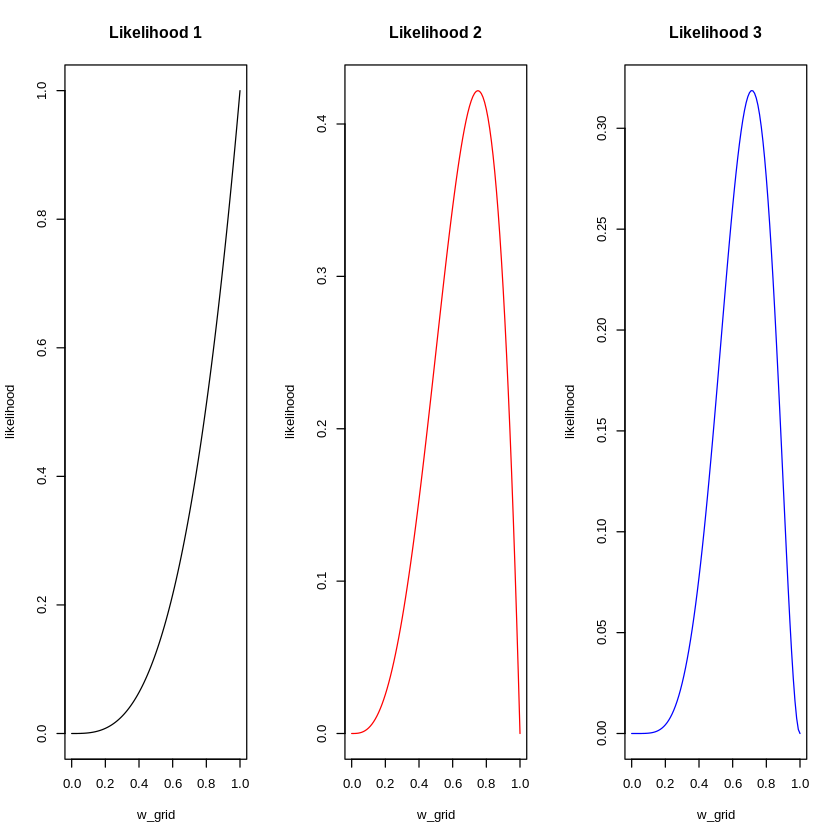

In [ ]:
par(mfrow=c(1,3))
plot(likelihood1 ~ w_grid, type="l", col="black", ylab="likelihood", main="Likelihood 1")
plot(likelihood2 ~ w_grid, type="l", col="red", ylab="likelihood", main="Likelihood 2")
plot(likelihood3 ~ w_grid, type="l", col="blue", ylab="likelihood", main="Likelihood 3")

Finally, we'll combine the prior with each likelihood to get our posterior distributions.

We start by multiplying the prior with each likelihood to get the unnormlaized posteriors.  
What is an unnormalized posterior?  Recall that Bayes' Theorem is

$posterior = (prior * likelihood) / marginal$.

Dividing the numerator, $prior * likelihood$ by the $marginal$ ensures that the total probablity of the posterior equals 100%.  Since the posterior represents every possible water proportion, it's important that this is reflected in the posterior by ensuring that it sums (or integrates) to 100%.  So to *normalize* our posterior, we divide my the marginal, which is just the sum of all possible unnormalized numerators:

$marginal = \Sigma (prior * likelihood)$

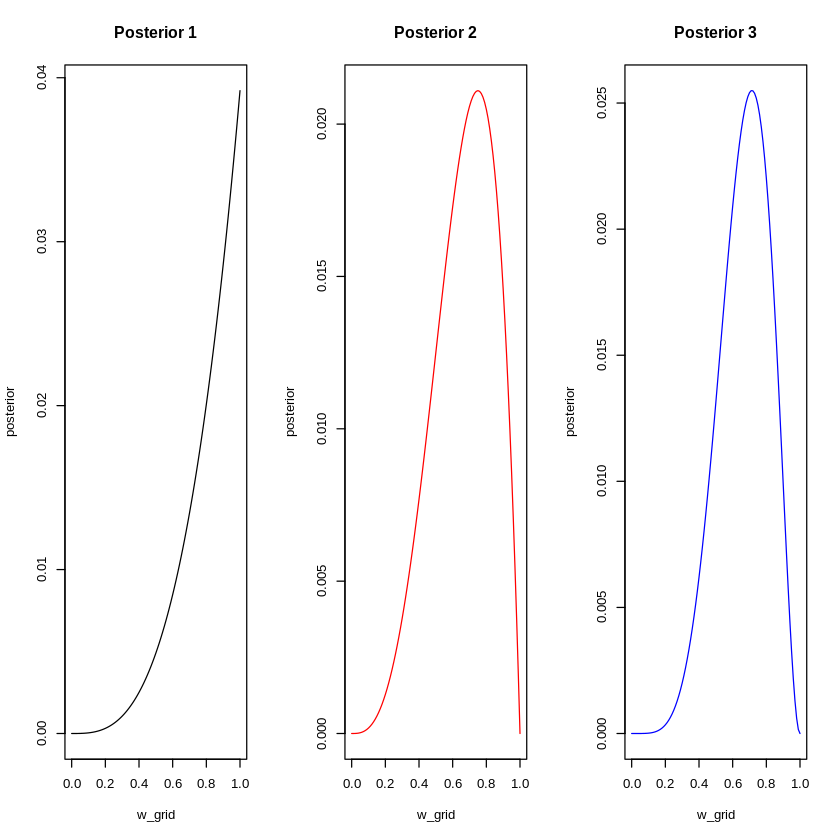

In [ ]:
unnormalized_posterior1 <- prior*likelihood1
unnormalized_posterior2 <- prior*likelihood2
unnormalized_posterior3 <- prior*likelihood3

marginal1 = sum(unnormalized_posterior1)
marginal2 = sum(unnormalized_posterior2)
marginal3 = sum(unnormalized_posterior3)

posterior1 = unnormalized_posterior1 / marginal1
posterior2 = unnormalized_posterior2 / marginal2
posterior3 = unnormalized_posterior3 / marginal3

par(mfrow=c(1,3))
plot(posterior1 ~ w_grid, type="l", col="black", ylab="posterior", main="Posterior 1")
plot(posterior2 ~ w_grid, type="l", col="red", ylab="posterior", main="Posterior 2")
plot(posterior3 ~ w_grid, type="l", col="blue", ylab="posterior", main="Posterior 3")

Notice that, in this case, since we used a uniform prior, the **shapes** posteriors are identical to the **shapes** likelihoods.  (The y-axis values are not identical since we multiplied the likelihood by the prior to arrive at the posterior.)  This is because we used a uniform prior, which does not affect the shape of the likelihood.

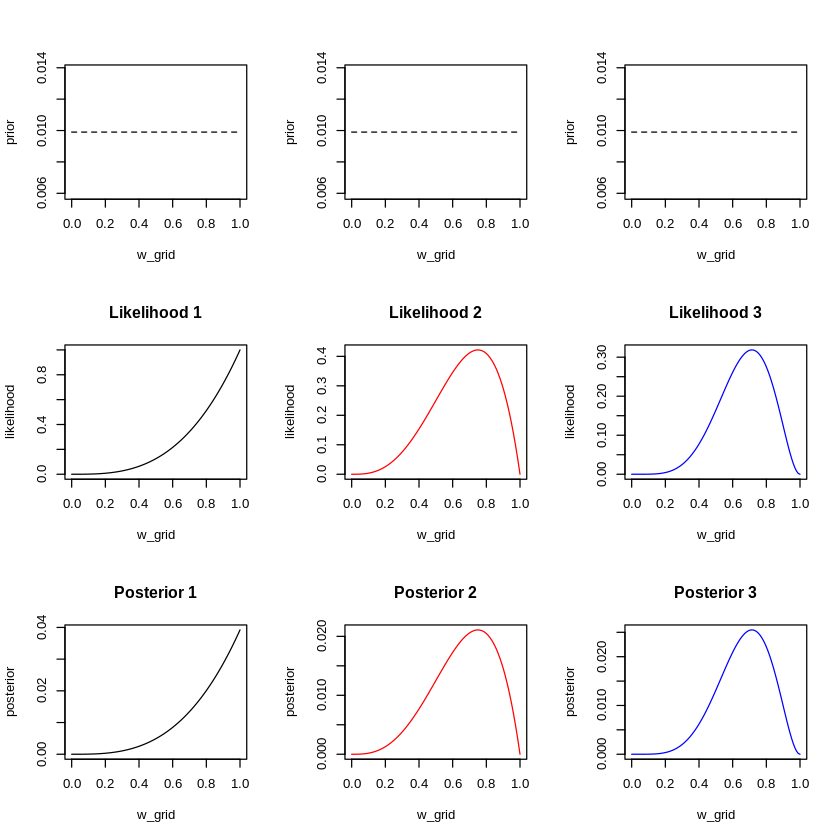

In [ ]:
par(mfrow=c(3,3))

plot(prior ~ w_grid, type="l", lty=2)
plot(prior ~ w_grid, type="l", lty=2)
plot(prior ~ w_grid, type="l", lty=2)

plot(likelihood1 ~ w_grid, type="l", col="black", ylab="likelihood", main="Likelihood 1")
plot(likelihood2 ~ w_grid, type="l", col="red", ylab="likelihood", main="Likelihood 2")
plot(likelihood3 ~ w_grid, type="l", col="blue", ylab="likelihood", main="Likelihood 3")

plot(posterior1 ~ w_grid, type="l", col="black", ylab="posterior", main="Posterior 1")
plot(posterior2 ~ w_grid, type="l", col="red", ylab="posterior", main="Posterior 2")
plot(posterior3 ~ w_grid, type="l", col="blue", ylab="posterior", main="Posterior 3")

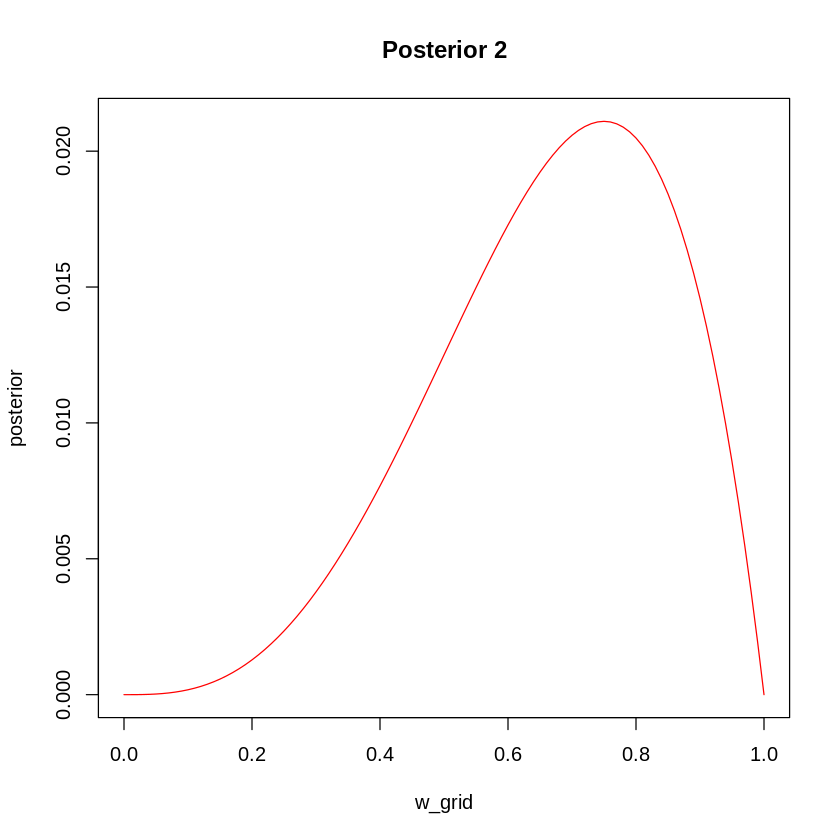

In [ ]:
plot(posterior2 ~ w_grid, type="l", col="red", ylab="posterior", main="Posterior 2")

But if we change the prior, we'll change the shape of the posteriors.  Let's change the prior to represent a belief that ~ 60% of the globe is water.

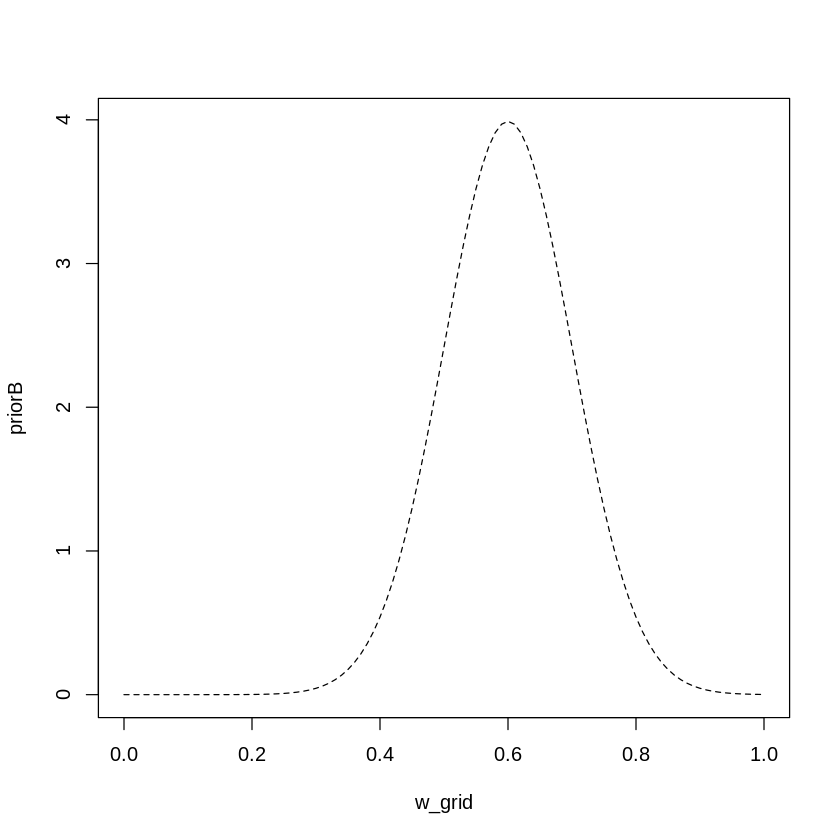

In [ ]:
priorB <- dnorm(w_grid, mean=0.60, sd=0.1)
plot(priorB ~ w_grid, type="l", lty=2)

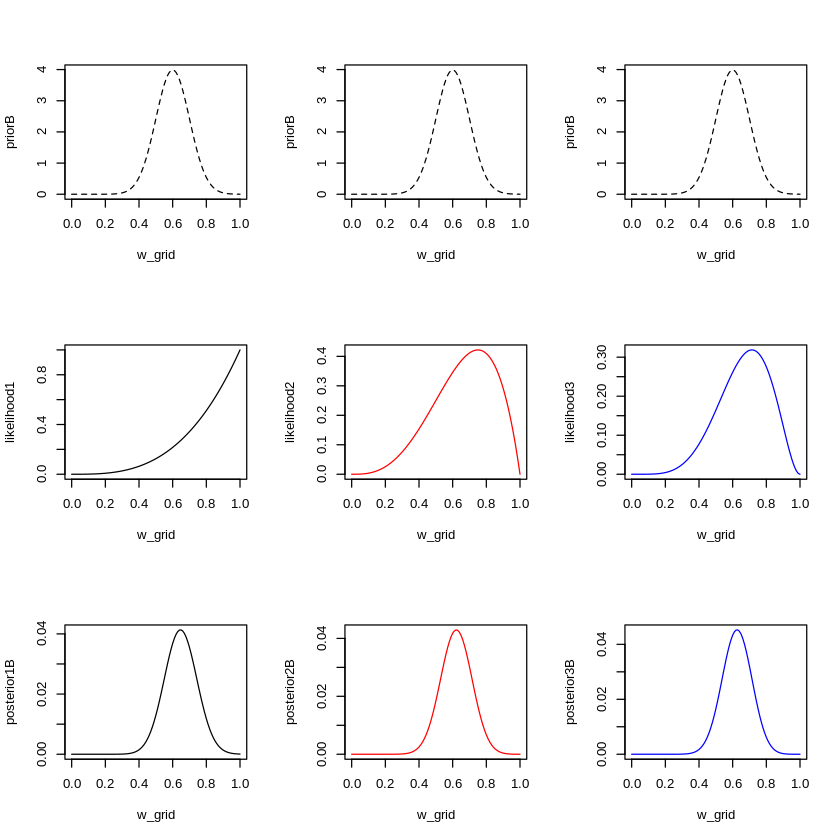

In [ ]:
unnormalized_posterior1B <- priorB*likelihood1
unnormalized_posterior2B <- priorB*likelihood2
unnormalized_posterior3B <- priorB*likelihood3

marginal1B <- sum(unnormalized_posterior1B)
marginal2B <- sum(unnormalized_posterior2B)
marginal3B <- sum(unnormalized_posterior3B)

posterior1B <- unnormalized_posterior1B/marginal1B
posterior2B <- unnormalized_posterior2B/marginal2B
posterior3B <- unnormalized_posterior3B/marginal3B

par(mfrow=c(3,3))
plot(priorB ~ w_grid, type="l", lty=2)
plot(priorB ~ w_grid, type="l", lty=2)
plot(priorB ~ w_grid, type="l", lty=2)
plot(likelihood1 ~ w_grid, type="l")
plot(likelihood2 ~ w_grid, type="l", col="red")
plot(likelihood3 ~ w_grid, type="l", col="blue")
plot(posterior1B ~ w_grid, type="l")
plot(posterior2B ~ w_grid, type="l", col="red")
plot(posterior3B ~ w_grid, type="l", col="blue")

### 2M2
#### Question
Now assume a prior for *p* (the proportion of a globe covered in water) that is equal to zero when $p < 0.5$, and is a positive constant when $p >= 0.5$.  Again compute and plot the grid-approximate posterior distribution for each of the sets of observations in the problem just above.
1.   W, W, W
2.   W, W, W, L
3.   L, W, W, L, W, W, W

#### Answer
This answer will follow the same process as problem 2M1.  The difference is that we need to change the prior:
*   $prior = 0$ for $p < 0.5$
*   $prior > 0$ for $p >= 0.5$.

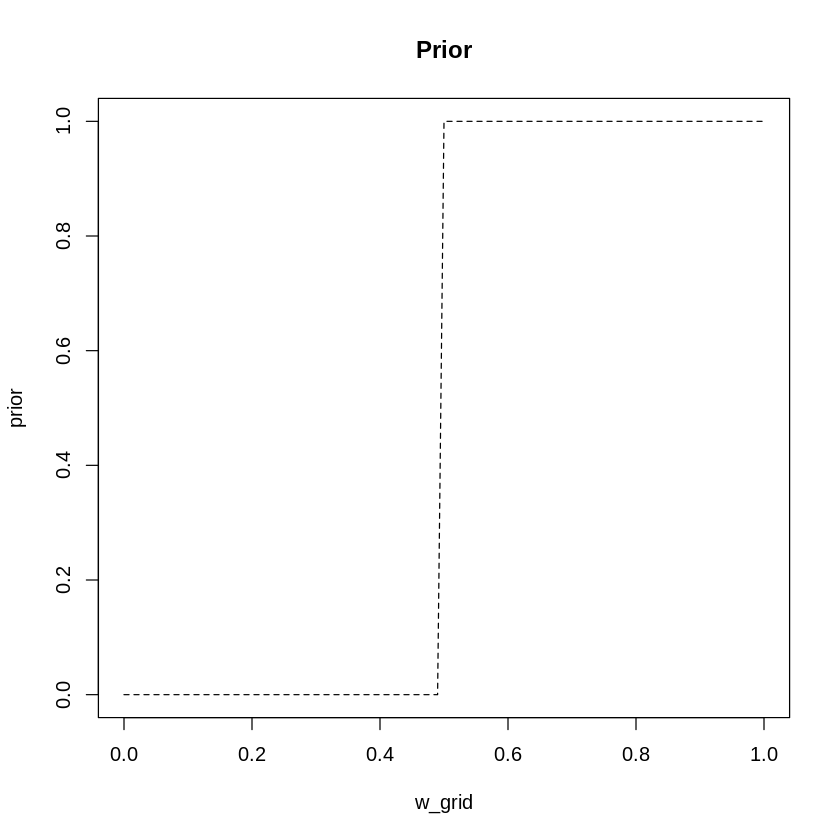

In [ ]:
w_grid <- seq(from=0, to=1, by=0.01)
prior <- ifelse(test = w_grid < 0.5,
                yes = 0,
                no = 1)
plot(prior ~ w_grid, type="l", lty=2, main="Prior")

Now for the likelihoods, which are the same as problem 2M1

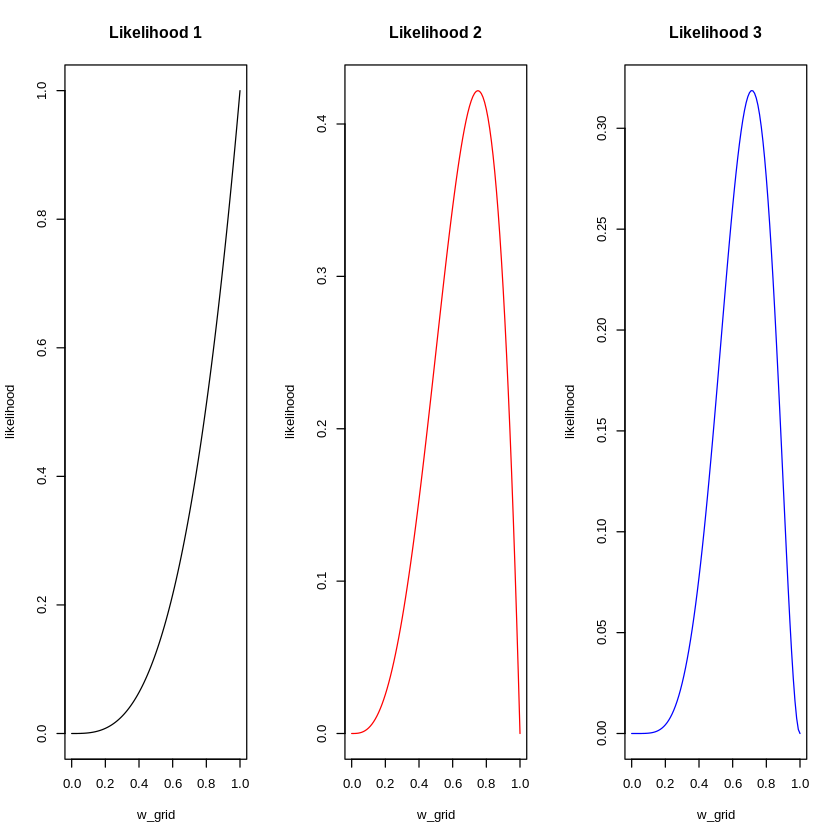

In [ ]:
likelihood1 <- dbinom(3, size=3, prob=w_grid) # W, W, W
likelihood2 <- dbinom(3, size=4, prob=w_grid) # W, W, W, L
likelihood3 <- dbinom(5, size=7, prob=w_grid) # L, W, W, L, W, W, W

par(mfrow=c(1,3))
plot(likelihood1 ~ w_grid, type="l", col="black", ylab="likelihood", main="Likelihood 1")
plot(likelihood2 ~ w_grid, type="l", col="red", ylab="likelihood", main="Likelihood 2")
plot(likelihood3 ~ w_grid, type="l", col="blue", ylab="likelihood", main="Likelihood 3")

Finally, the unnormalized and normalized posteriors.

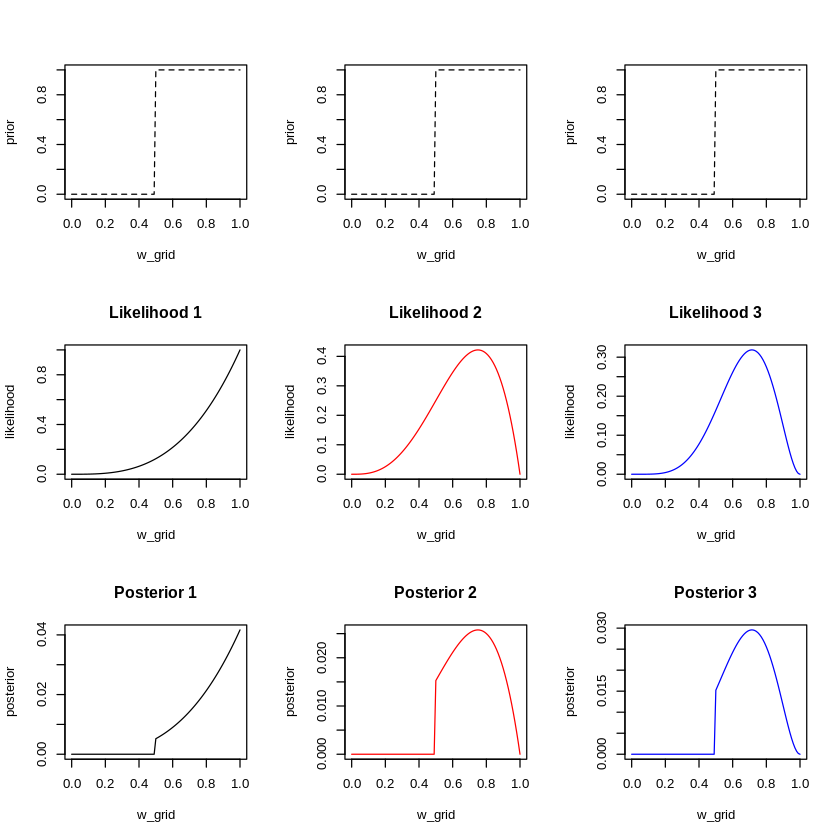

In [ ]:
unnormalized_posterior1 <- prior*likelihood1
unnormalized_posterior2 <- prior*likelihood2
unnormalized_posterior3 <- prior*likelihood3

marginal1 = sum(unnormalized_posterior1)
marginal2 = sum(unnormalized_posterior2)
marginal3 = sum(unnormalized_posterior3)

posterior1 = unnormalized_posterior1 / marginal1
posterior2 = unnormalized_posterior2 / marginal2
posterior3 = unnormalized_posterior3 / marginal3

# Plot
par(mfrow=c(3,3))

plot(prior ~ w_grid, type="l", lty=2)
plot(prior ~ w_grid, type="l", lty=2)
plot(prior ~ w_grid, type="l", lty=2)

plot(likelihood1 ~ w_grid, type="l", col="black", ylab="likelihood", main="Likelihood 1")
plot(likelihood2 ~ w_grid, type="l", col="red", ylab="likelihood", main="Likelihood 2")
plot(likelihood3 ~ w_grid, type="l", col="blue", ylab="likelihood", main="Likelihood 3")

plot(posterior1 ~ w_grid, type="l", col="black", ylab="posterior", main="Posterior 1")
plot(posterior2 ~ w_grid, type="l", col="red", ylab="posterior", main="Posterior 2")
plot(posterior3 ~ w_grid, type="l", col="blue", ylab="posterior", main="Posterior 3")

### 2M3
#### Question
Suppose there are two globes, one for Earth and one for Mars.  The Earth globe is 70% covered in water.  The Mars globe is 100% land.  Further suppose that one of these globes--you don't know which--was tossed in the air and produced a "land" observation.  Assume that each globe was equally likely to be tossed.  Show that the posterior probability that the globe was the Earth, conditional on seeing "land" (Pr(Earth|land)), is 0.23.

#### Answer
Firstly, notice that the *knowns* and *unknowns* from this problem differ from 2M1 and 2M2: whereas we *knew* we were tossing the Earth globe but did *not know* the proportion of water/land in 2M1 and 2M2, now we *know* the proportion of water/land but *don't know* which globe we are tossing.  So that is what we're trying to figure out--which globe we are tossing.

So we should start by assigning a prior probability that we are tossing the Earth globe.  We know from the question that we are equally likely to be tossing either globe.  Therefore, $p(Earth) = 0.5$.  The prior for the Mars globe is also 50%.

In [ ]:
prior_Earth <- prior_Mars <- 0.5

A couple of things to notice.  Firstly, the question has told us to assume $p(Earth) = 0.5$.  But even if the question did not specify a prior, we would probably pick $p(Earth) = 0.5$.  Why?  The answer will be explored more deeply later in the book under a topic called "maximal entropy".  For now, it's good enough to notice that assigning 50/50 as the prior represents maximal uncertainty given that all we know is that we've tossed one of two globes.  If we knew/assumed additional facts, we would be less uncertain; we would know Earth was more or less likely, so we would assign a different prior $p(Earth) > 0.5$ or $p(Earth) < 0.5$.

Secondly, in problems 2M1 and 2M2, we started by assigning a grid `w_grid` of values over which we would assign priors and find posteriors.  Why haven't done that here?  The reason is because, instead of entertaining many possible values (representing the probability of having tossed the Earth globe), we are only using a single value (50%).  That means we have much less to keep track of.  But we could still use the many-valued grid approach; the prior would look like this:

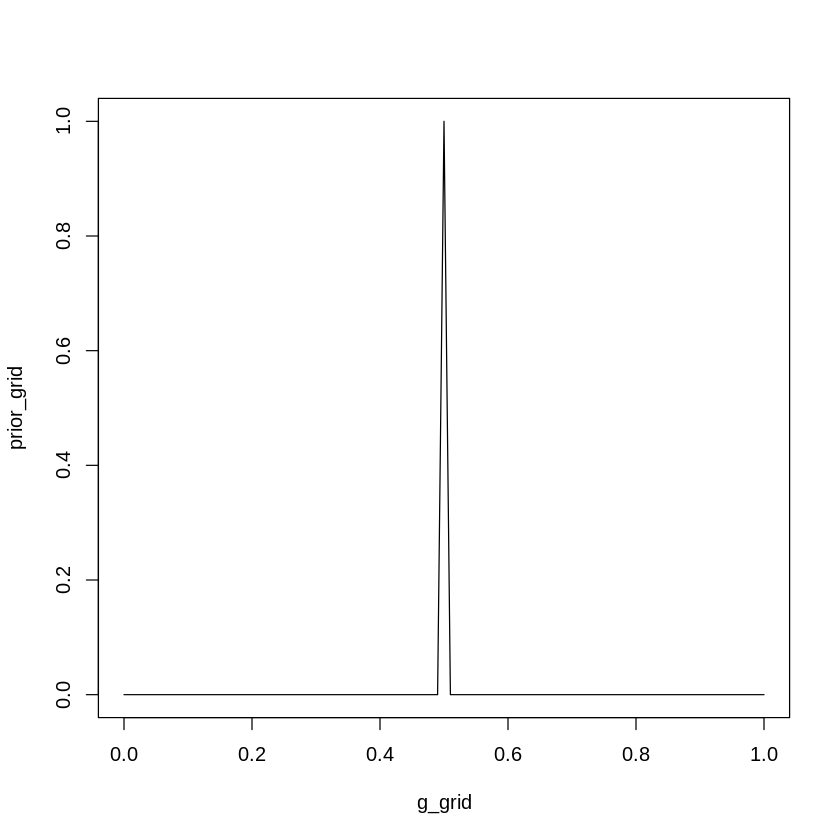

In [ ]:
g_grid <- seq(from=0, to=1, by=0.01)
prior_grid <- c(rep(0, 50), 1, rep(0, 50))
plot(prior_grid ~ g_grid, type="l")

where all of the prior probabiltiy is stacked up at 50%.  The same thing would happen for the likelihoods and posteriors.

Now we need the likelihood of land on the assumption that we've tossed the Earth globe, $p(land|Earth)$, as well as for the Mars globe, $p(land|Mars)$.  These are given to us in the question.

*   $p(land|Earth) = 0.30$
*   $p(land|Mars) = 1.00$

In [ ]:
likelihood_Earth <- 1.00 - 0.70
likelihood_Mars <- 1.00

Before finding the posterior(s), we'll need the marginal, the probability of "land" over both Earth and Mars:

$p(land) = p(land|Earth)*p(Earth) + p(land|Mars)*p(Mars)$

In [ ]:
marginal <- prior_Earth*likelihood_Earth + prior_Mars*likelihood_Mars

Now to plug these into Bayes':

$p(Earth|land) = (p(land|Earth)*p(Earth)) / p(land)$

$p(Mars|land) = (p(land|Mars)*p(Mars)) / p(land)$

In [ ]:
posterior_Earth <- prior_Earth*likelihood_Earth / marginal
posterior_Mars <- prior_Mars*likelihood_Mars / marginal

cat(
  "p(Earth|land) = ", paste(round(posterior_Earth, 4) * 100, "%"), "\n",
  "p(Mars|land) = ", paste(round(posterior_Mars, 4) * 100, "%"), "\n"
)


p(Earth|land) =  23.08 % 
 p(Mars|land) =  76.92 % 


And there we have that the posterior $p(Earth|land)$ is just about 23%.  Also notice that the posteriors $p(Earth|land)$ and $p(Mars|land)$ sum to 100%

In [ ]:
posterior_Earth + posterior_Mars

[1] 1

### 2M4
#### Question
Suppose you have a deck with only three cards. Each card has two sides, and each side is either  black or white. One card has two black sides. The second card has one black and one white side. The  third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone  reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,  but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This  means counting up the ways that each card could produce the observed data (a black side facing up on the table).
#### Answer
This question is tricky because it suggests an intuitive answer that is incorrect.  To put it into Bayesian terms, it asks us to find $p(\text{H: face down is black | E: face up is black})$.  For me, I immediately jump to an **incorrect** reasoning process:

*1.   There are two cards with a black side.*

*2.   I observe a card with a black side.*

*3.   Therefore, the probability that the other side is black (i.e., that I am looking at the black-black card) is 50%.*

But <u>this is the wrong answer</u>.  Why?  Where has my reasoning gone astray?  My mistake is that I am ignoring some of the ways the observation could arise; namely that are 2 ways for the black-black card to show black but only 1 way for the black-white card to show black.  I might never correct my intuition for this, but I can always commit to rigorously thinking through the problem.  In this case, that means applying Bayes' Theorem:

$p(\text{H: black-black | E: face up is black}) =
\frac{p(\text{E: face up is black | H: black-black}) \cdot p(\text{H: black-black})}{p(\text{E: face up is black})}$

Let's figure these values one at a time.  

*   The likelihood $p(\text{E: face up is black | H: black-black})$ must equal $1$, since if the card is black-black, the upward face will always be black.
*     Next, the prior $p(\text{H: black-black})$ is $1/3$ since the black-black card is 1 or 3 cards we could have picked.  (It is tempting here to say that $p(\text{H: black-black})$ should be $1/2$ since there are only 2 cards with a black side, but remember that the prior is established <u>before seeing the evidence</u>.)
*   Finally, the marginal.  How many ways can we see a black side face up?  Well, there are 3 cards with 2 sides each, so there are 6 total sides; 3 of these sides are black, so $p(\text{E: face up is black})$ must equal $1/2$.

Let's plug these into Bayes'.

In [ ]:
prior <- 1/3
likelihood <- 1
marginal <- 1/2
(posterior <- (prior*likelihood)/marginal)

[1] 0.6666667

### 2M5
#### Question
Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is  drawn from the bag and a black side appears face up. Again calculate the probability that the other  side is black.
#### Answer
We can reuse the same process from last time, but now adjusting the prior and marginal.
The prior should reflect that 2/4 cards are now black-black, and the marginal should reflect that 5/8 sides are black.

In [ ]:
prior <- 1/2
likelihood <- 1
marginal <- 5/8
(posterior <- (prior*likelihood)/marginal)

### 2M6
#### Question
Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white  sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume  there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that  for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to  pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that  the probability the other side is black is now 0.5. Use the counting method, as before.
#### Answer
Once again, it is best to find values for the terms of Bayes'.  But now there's a twist: we are less likely to draw cards with black ink in proportion to the amount of black ink they have.  The question suggests that this is because the black ink is *heaver*, cause the card to sink below the rest.  But we can also think of this as there being fewer cards with black ink in proprotion to the amount of black ink they display (maybe black ink is more expensive so the card manufacturer makes fewer).  Either way, the question tells us we draw BB, WB, and BB in a 1:2:3 balance; so 1/6 draws is BB, 2/6 are WB, and 3/6 are WW.  These are our new priors.

In [ ]:
priorBB <- 1/6
priorWB <- 2/6
priorWW <- 3/6

In the previous card questions, we simply counted the number of black sides and total sides to calculate the marginal:

$marginal = \text{black sides} / \text{total sides}$

The reason we could do this so straightforwardly was because the prior for each card was equal at 1/3.  If we wanted, we could've employed a sligthly more complicated method: finding the ***weighted average***, where we weight the number of black sides by the priors:

$marginal = \text{WW prior * black sides on WW/2} + \text{WB prior * black sides on WB/2} + \text{BB prior * black sides on BB/2} = (1/3)*(0/2) + (1/3)*(1/2) + (1/3)*(2/2) = 0/6 + 1/6 + 2/6 = 3/6 = 1/2$

Notice that the number of black sides per card is the likelihood.  For example, the likelihood of black given WB is 1/2.  So our weighted-average marginal is just taking the sum of each prior-likelihood product.

We'll set that up here and find that the posterior $p(\text{BB|black})=0.5$.

In [ ]:
likelihoodBB <- 1
likelihoodWB <- 1/2
likelihoodWW <- 0

marginal <- priorBB*likelihoodBB + priorWB*likelihoodWB + priorWW*likelihoodWW

(posteriorBB <- (priorBB*likelihoodBB) / marginal)

### 2M7
#### Question
Assume again the original card problem, with a single card showing a black side face up. Before  looking at the other side, we draw another card from the bag and lay it face up on the table. The face  that is shown on the new card is white. Show that the probability that the first card, the one showing  a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat  this like the sequence of globe tosses, counting all the ways to see each observation, for each possible  first card.
#### Answer
We're back to the familiar set up from problem 2M4.  After solving that problem, we concluded that the posterior proability $p(\text{black-black | black}) = 2/3$.  We can think of this problem as a continuation of that, wherein we're now given an additional piece of evidence: the face-up side of a second card is white, meaning that is either the white-white card or that white-black card.  We are still asked to find the posterior probability that the first card's downward face is black.

So we're trying to find the posterior $p(\text{black-black|black, white})$.  The first thing to notice is that these observations are NOT independent.  The first card is drawn with three cards in the bag, meaning it could be any of the three, but the second card is drawn with only two cards in the bag, so it could not be the same card as the first one that was drawn.  Therefore, rather than treating *black face* and *white face* as two separate observations, we'll consider them as a single piece of evidece like *black face, then white face*.

Let's start with our prior.  Just like in 2M4, we are assuming that each card is equally probable to have been drawn.

In [ ]:
prior_WW <- prior_WB <- prior_BB <- 1/3

Now the likelihoods.  These are reflecting the number of ways to get the single piece of evidence *black face, then white face*.

In [ ]:
likelihood_1B2W_given1WW <- (1)*(0) # 100% of the time, WW first cannot produce black first
likelihood_1B2W_given1WB <- (1/2)*(2/4) # 50% of the time, WB first produces black first;
                                        # of those, WW is next drawn 50% of the time (producing white second 100% of the time)
                                        # while BB is next drawn 50% of the time (producing white 0% of the time).
likelihood_1B2W_given1BB <- (1)*(3/4) # 100% of the time, BB first produces black first

In [ ]:
marginal <- prior_WW*likelihood_1B2W_given1WW + prior_WB*likelihood_1B2W_given1WB + prior_BB*likelihood_1B2W_given1BB

In [ ]:
(posterior_BB <- (prior_BB*likelihood_BthenW_given1BB) / marginal)

## Hard
### 2H1
#### Question
Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes:
*   Species A gives birth to twins  10% of the time, otherwise birthing a single infant.
*   Species B births twins 20% of the time, otherwise  birthing singleton infants.

Assume these numbers are known with certainty, from many years of field  research.

Now suppose you are managing a captive panda breeding program. You have a new female panda  of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?
#### Answer
Hopefully you can see the parallels here the card examples in 2M4-2M7.  But this time, instead of trying to find the posterior $p(\text{other side is black | upward face is black})$ we are trying to find $p(\text{second birthing is twins | first birthing is twins})$ (let's shorten this to $p(twins_2 | twins_1)$).

We'd normally start by trying to find values for the terms of Bayes'.  Here, that'd look like this:

$p(\text{twins2 | twins1}) =
\frac{p(\text{twins1 | twins2}) \cdot p(\text{twins2})}{p(twins1)}$

But the likelihood $p(\text{twins1 | twins2})$ is just as uncertain as the posterior $p(\text{twins2 | twins1})$.  So let's use a different equation:

$p(\text{twins2 | twins1}) =
\frac{p(\text{twins1, twins2})}{p(twins1)}$

In [ ]:
speciesA <- speciesB <- 1/2 # prior

aTwins <- 0.1  # likelihood
bTwins <- 0.2

# marginal
twins1 <- twins2 <- speciesA*aTwins + speciesB*bTwins

# joint
twins1_and_twins2 <- speciesA*aTwins^2 + speciesB*bTwins^2 # squaring because the probability of twins for either species is just the (probability of twins) * (probability of twins) for a species

# posterior
(twins2_given_twins1 <- twins1_and_twins2 / twins1)

[1] 0.1666667

### 2H2
#### Question
Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.
#### Answer
Now we're trying to find $p(\text{SpeciesA | twins1})$.  From problem 2H1, we have
*   the prior $p(\text{SpeciesA}) = 1/2$,
*   the likelihood $p(\text{twins1 | SpeciesA})=0.1$,
*   and the marginal $p(\text{twins1}) = 0.15$ (remember, we solved for this in problem 2H1).

So this problem is solved by straightforwardly plugging these values into Bayes':

In [ ]:
speciesA <- 1/2 # prior
aTwins <- 0.1 # likelihood
twins1 <- 0.15 # marginal

(A_given_twins1 <- (speciesA*aTwins) / twins1) # posterior

[1] 0.3333333

### 2H3
#### Question
Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

#### Answer
We could answer this in the same way we've been answering the other questions; start with our prior of $p(SpeciesA)=1/2)$ and our likelihood, this time with the evidence being *twins1, singleton2*, $p(twins1, singleton2 | SpeciesA)$, then churning through Bayes.

However, let's use a different approach by taking advantage of an important feature in Bayes: ***The previous posterior becomes the new prior when new evidence comes in***.  This should make sense; if the initial prior is our best estimate of the probabilities before seeing the evidence, and the subsequent posterior is our best estimate after seeing the evidence, then the posterior is also our best estimate before seeing new evidence.

So from problem 2H2, our prior was $p(SpeciesA)=1/2$, but this was updated by the evidence to arrive at the posterior $p(SpeciesA|twins1)=1/3$.  Now, we see some additional evidence, that the same mama panda has given birth to a singleton baby.  Before we saw this evidence, our prior should be $p(SpeciesA)=1/3$, since that's what we estimated after seeing the first set of twins.  So now we reconstruct Bayes to reflect this updated prior and the new evidence.

In [ ]:
speciesA <- A_given_twins1 # Prior, is the same as the posterior from 2H2
speciesB <- 1 - speciesA # The prior for Species B is just 1 - p(speciesA)

singleton_given_A <- 1 - 0.1 # Likelihood; since know p(twins|A)=0.1, p(single|A) = 1-p(twins|A) = 1 - 0.1 = 0.9
singleton_given_B <- 1 - 0.2 # The likelihood for Species B follows the same logic as for Species A

marginal <- speciesA*singleton_given_A + speciesB*singleton_given_B # The marginal reflects the updated priors

(speciesA_given_singleton <- (speciesA*singleton_given_A) / marginal) # Posterior

[1] 0.36

With our new evidence, we get a small increase (from 33.3% to 36%) in the probability that we have Species A.  We found this by taking the initial posterior as our new prior, then updating once again with the new evidence.  This was a new approach, taking advantage of the fact that Bayes allows us to accumulate evidence over multiple trials.

But we take the approach we've been using: beginning with the prior $p(SpeciesA)=1/2$ then updating that with the combined evidence *twins1, singleton2*.  We'll get the same answer.

In [ ]:
speciesA <- speciesB <- 1/2 # priors

twins_given_A <- 0.1
single_given_A <- 1 - twins_given_A
twins_given_B <- 0.2
single_given_B <- 1 - twins_given_B

twinsSingle_given_A <- twins_given_A*single_given_A # likelihoods; we consider the births to be independent events when we condition on the species
twinsSingle_given_B <- twins_given_B*single_given_B

marginal <- speciesA*twinsSingle_given_A + speciesB*twinsSingle_given_B

(speciesA_given_singleton <- (speciesA*twinsSingle_given_A) / marginal)

[1] 0.36

### 2H4
#### Question
A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of  the data, even if the data are of different types.  

So suppose now that a veterinarian comes along who has a new genetic test that she claims can  identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test:  
*   The probability it correctly identifies a species A panda is 0.8.  
*   The probability it correctly identifies a species B panda is 0.65.  

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your  panda is species A. Then redo your calculation, now using the birth data as well.

#### Answer
##### Ignoring the births



In [ ]:
prior_SpeciesA <- prior_SpeciesB <- 0.5

like_testA_givenSpeciesA <- 0.8 # If you have species A, the probability that the test says A is 80%
like_testB_givenSpeciesB <- 0.65 # If you have species B, the probability that the test says B is 65%
like_testA_givenSpeciesB <- 1 - like_testB_givenSpeciesB # If you have species B, the probability that the test says A is 20%
like_testB_givenSpeciesA <- 1 - like_testA_givenSpeciesA # If you have species A, the probability that the test says B is 35%

marginal_TestA <- prior_SpeciesA*like_testA_givenSpeciesA + prior_SpeciesB*like_testA_givenSpeciesB

(post_SpeciesA_givenTestA <- (prior_SpeciesA*like_testA_givenSpeciesA) / marginal_TestA)

##### Including births
Now starting over.  This time starting with the birth data from questions 2H2 and 2H3, then factoring in this test.
We'll use the same method from 2H3, where we adopted the updated prior (aka, the posterior) as the prior for this new Bayesian calculation--which uses the test data from the vet.

In [ ]:
prior_SpeciesA <- 0.36 # from question 2H3
prior_SpeciesB <- 1 - prior_SpeciesA

# Just copy-pasting the rest of the code from the first part of the problem, since all we have to do is change the priors
like_testA_givenSpeciesA <- 0.8 # If you have species A, the probability that the test says A is 80%
like_testB_givenSpeciesB <- 0.65 # If you have species B, the probability that the test says B is 65%
like_testA_givenSpeciesB <- 1 - like_testB_givenSpeciesB # If you have species B, the probability that the test says A is 20%
like_testB_givenSpeciesA <- 1 - like_testA_givenSpeciesA # If you have species A, the probability that the test says B is 35%

marginal_TestA <- prior_SpeciesA*like_testA_givenSpeciesA + prior_SpeciesB*like_testA_givenSpeciesB

(post_SpeciesA_givenTestA <- (prior_SpeciesA*like_testA_givenSpeciesA) / marginal_TestA)